Doğal Dil İşleme - Natural Language Processing

```
# Bu, kod olarak biçimlendirilmiştir
```



In [ ]:
!pip install nltk
!pip install textblob


In [ ]:
!pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install wordcloud

In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

Text Preprocessing

In [ ]:
df = pd.read_csv("amazon_reviews.csv")

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In [ ]:
#Normalizing Case Folding
df["reviewText"]

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...
4911,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...
4913,Good amount of space for the stuff I want to d...


In [ ]:
df["reviewText"] = df["reviewText"].str.lower()

In [ ]:
#Noktalama İşlemleri - Punctuations
df["reviewText"] = df["reviewText"].str.replace('[^\w\s]','')

In [ ]:
#regular expression - bunu sadece bil ama önemli değil

In [ ]:
#number
df["reviewText"] = df["reviewText"].str.replace('\d','')

In [ ]:
#stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sw = stopwords.words('english')

In [ ]:
df["reviewText"] = df["reviewText"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [ ]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","purchased device, worked advertised. never muc...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",works expected. sprung higher capacity. think ...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked great.had diff. bran 64gb card we...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","bought retail packaging, arrived legit, orange...",5.0,best deal around,1373673600,2013-07-13,513,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]","bought sandisk 16gb class 10 use htc inspire, ...",1.0,Do not waste your money.,1374537600,2013-07-23,503,0,0
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",used extending capabilities samsung galaxy not...,5.0,Great item!,1377129600,2013-08-22,473,0,0
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",great card fast reliable. comes optional adapt...,5.0,Fast and reliable memory card,1396224000,2014-03-31,252,0,0
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]","good amount space stuff want do, fits gopro. say?",5.0,Great little card,1379289600,2013-09-16,448,0,0


In [ ]:
#Rare words
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

In [ ]:
temp_df

,count
card,3475
works,1468
memory,1182
sd,1131
phone,1113
...,...
waaaaaaay,1
s3/ip4s/ip5!,1
11-28-12*********after,1
total...,1


In [ ]:
drops = temp_df[temp_df <= 1]

In [ ]:
drops

,count
fine).,1
cameras/laptop,1
invented,1
"ways,",1
ram;,1
...,...
waaaaaaay,1
s3/ip4s/ip5!,1
11-28-12*********after,1
total...,1


In [ ]:
df["reviewText"] = df["reviewText"].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))

In [ ]:
df["reviewText"]

,reviewText
0,issues.
1,"purchased device, worked advertised. never muc..."
2,works expected. higher capacity. think made bi...
3,think worked 64gb card went south 3 one held p...
4,"bought retail packaging, arrived legit, versio..."
...,...
4910,"bought sandisk 16gb class 10 use htc 3 months,..."
4911,used capabilities samsung galaxy note 10. grea...
4912,great card fast reliable. comes optional adapt...
4913,"good amount space stuff want do, fits gopro. say?"


In [ ]:
#tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

,reviewText
0,[issues]
1,"[purchased, device, worked, advertised, never,..."
2,"[works, expected, higher, capacity, think, mad..."
3,"[think, worked, 64gb, card, went, south, 3, on..."
4,"[bought, retail, packaging, arrived, legit, ve..."


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#lemmaztization
df["reviewText"] = df["reviewText"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
df["reviewText"]

,reviewText
0,issues.
1,"purchased device, worked advertised. never muc..."
2,work expected. higher capacity. think made bit...
3,think worked 64gb card went south 3 one held p...
4,"bought retail packaging, arrived legit, versio..."
...,...
4910,"bought sandisk 16gb class 10 use htc 3 months,..."
4911,used capability samsung galaxy note 10. greatl...
4912,great card fast reliable. come optional adapte...
4913,"good amount space stuff want do, fit gopro. say?"


Text Visualization

In [ ]:
#terim frekanslarının hesaplanması
df["reviewText"]

,reviewText
0,issues.
1,"purchased device, worked advertised. never muc..."
2,work expected. higher capacity. think made bit...
3,think worked 64gb card went south 3 one held p...
4,"bought retail packaging, arrived legit, versio..."
...,...
4910,"bought sandisk 16gb class 10 use htc 3 months,..."
4911,used capability samsung galaxy note 10. greatl...
4912,great card fast reliable. come optional adapte...
4913,"good amount space stuff want do, fit gopro. say?"


In [ ]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
<ipython-input-34-7b563f3fb919>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-34-7b563f3fb919>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-34-7b563f3fb919>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-34-7b563f3fb919>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndar

In [ ]:
tf.columns = ["words","tf"]

In [ ]:
tf.sort_values("tf",ascending=False)

,words,tf
26,card,4130.0
15,work,1879.0
7,phone,1220.0
109,memory,1192.0
65,sd,1133.0
...,...,...
2587,upto,2.0
2591,"mostly,",2.0
4478,alway,2.0
5863,4.9,2.0


<Axes: xlabel='words'>

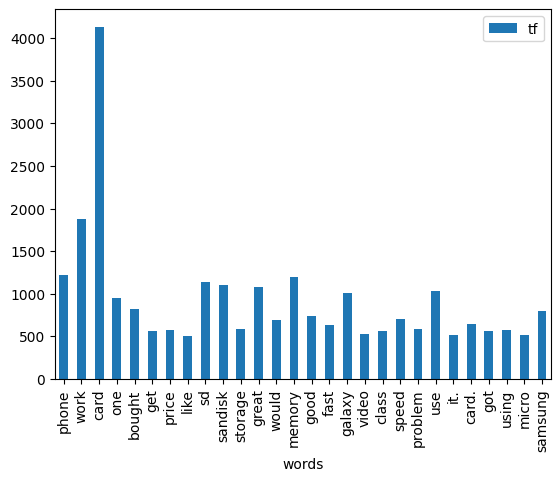

In [ ]:
#sütun grafik
tf[tf["tf"] > 500].plot.bar(x="words",y="tf")

In [ ]:
#kelime bulutu

In [ ]:
text = " ".join(i for i in df.reviewText)

(-0.5, 399.5, 199.5, -0.5)

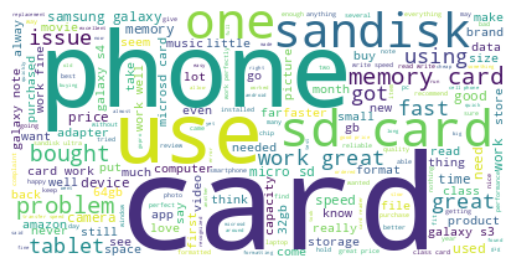

In [ ]:
worldclock = WordCloud(background_color="white").generate(text)
plt.imshow(worldclock,interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

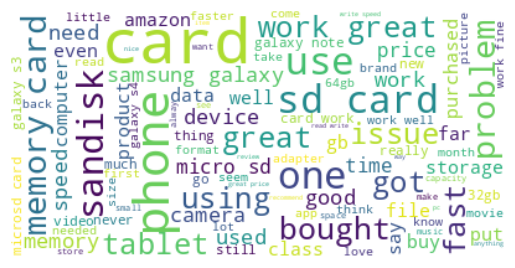

In [ ]:
worldclock = WordCloud(max_font_size=50,max_words=100,
                       background_color="white").generate(text)
plt.imshow(worldclock,interpolation="bilinear")
plt.axis("off")

In [ ]:
worldclock.to_file("wordcloud.png")

In [ ]:
#şablonlara göre kelime bulutu oluşturma

In [ ]:
tr_mask = np.array(Image.open("d.png"))

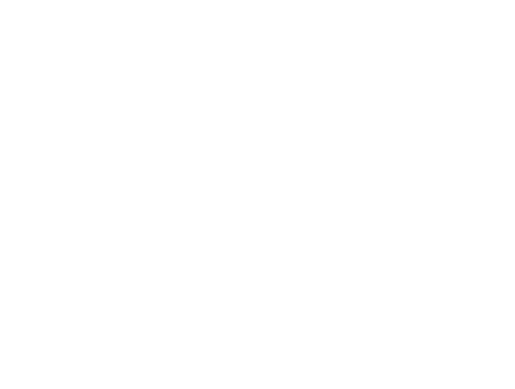

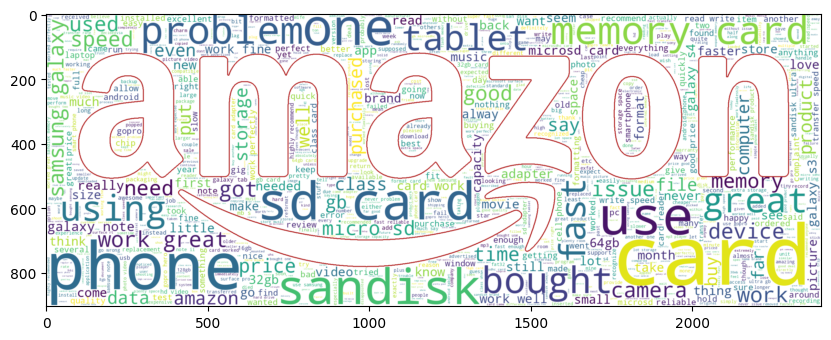

In [ ]:
wc = WordCloud(background_color="white",max_words=1000,mask=tr_mask,
               contour_width=3,contour_color="firebrick")

wc.generate(text)
plt.axis("off")
plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation="bilinear")

Sentiment Analysis - Duygu Analizi

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","purchased device, worked advertised. never muc...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected. higher capacity. think made bit...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked 64gb card went south 3 one held p...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","bought retail packaging, arrived legit, versio...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In [ ]:
df["reviewText"].head()

,reviewText
0,issues.
1,"purchased device, worked advertised. never muc..."
2,work expected. higher capacity. think made bit...
3,think worked 64gb card went south 3 one held p...
4,"bought retail packaging, arrived legit, versio..."


In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores("The film was good")

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [ ]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

,reviewText
0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
3,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp..."
4,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp..."
5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,"{'neg': 0.055, 'neu': 0.633, 'pos': 0.312, 'co..."
7,"{'neg': 0.045, 'neu': 0.675, 'pos': 0.28, 'com..."
8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp..."


In [ ]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

,reviewText
0,0.0000
1,0.0000
2,0.4019
3,0.6486
4,0.8591
5,0.0000
6,0.9074
7,0.8074
8,0.0000
9,0.9167


In [ ]:
df["polarity"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [ ]:
#feature engineering
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

,reviewText
0,neg
1,neg
2,pos
3,pos
4,pos
5,neg
6,pos
7,pos
8,neg
9,pos


In [ ]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [ ]:
df["sentiment_label"].value_counts()

,count
sentiment_label,
pos,3932
neg,983


In [ ]:
df.groupby("sentiment_label").agg({"overall":"mean"})

,overall
sentiment_label,
neg,4.111902
pos,4.706511


In [ ]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [ ]:
y = df["sentiment_label"]
x = df["reviewText"]

In [ ]:
#count vectors
a = "Bu bir örnektir."
TextBlob(a).ngrams(3)

[WordList(['Bu', 'bir', 'örnektir'])]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

In [ ]:
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_c.toarray()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [ ]:
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out() # Use get_feature_names_out() instead of get_feature_names()
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:
vectorizer = CountVectorizer(analyzer="word",ngram_range=(2,2))
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X_c.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

In [ ]:
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()[10:15]
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_t = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X_t.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,3))
X_t = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X_t.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.37102749,
        0.30037873, 0.47060133, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37102749, 0.37102749, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37102749, 0.37102749, 0.        , 0.        ],
       [0.        , 0.        , 0.34488069, 0.34488069, 0.        ,
        0.22013288, 0.        , 0.34488069, 0.        , 0.        ,
        0.        , 0.34488069, 0.        , 0.        , 0.34488069,
        0.34488069, 0.        , 0.        , 0.        , 0.34488069,
        0.34488069, 0.        , 0.        , 0.        , 0.        ],
       [0.36153669, 0.36153669, 0.        , 0.        , 0.        ,
        0.23076418, 0.        , 0.        , 0.36153669, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36153669, 0.36153669, 0.36153669, 0.        ,
        0.        , 0.28503968, 0.28503968, 0.

In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()
X_n.toarray()


vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(corpus)

vectorizer.get_feature_names_out()[10:15]
X_count.toarray()[10:15]

array([], shape=(0, 9), dtype=int64)

In [ ]:
#sentiment modeling
#logistic regression
log_model = LogisticRegression().fit(cor, y)

cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()


new_review = pd.Series("this product is great")
new_review = pd.Series("look at that shit very bad")
new_review = pd.Series("it was good but I am sure that it fits me")

new_review = TfidfVectorizer().fit(X).transform(new_review)

log_model.predict(new_review)

random_review = pd.Series(df["reviewText"].sample(1).values)

new_review = TfidfVectorizer().fit(X).transform(random_review)

log_model.predict(new_review)